<center><h1>Diving into Data Preprocessing</h1></center>

## Table of contents

* [Feature Engineering](#feat_engg)
    * [Missing Values Treatment](#missing)
    * [Outliers Treatment](#outliers)
    * [Categorical Data Handling](#cat)
    * [Imbalanced Class Handling](#imbal)
    * [Data Transformation](#trans)
    * [Extracting Date](#date)


<a id='feat_engg'></a>
## Feature Engineering

### What is Feature Engineering?
**Feature engineering is about creating new input features from your existing ones.**

This is often one of the most valuable tasks a data scientist can do to improve model performance, for 3 big reasons:

* You can isolate and highlight key information, which helps your algorithms "focus" on what’s important.
* You can bring in your own domain expertise.
* Most importantly, once you understand the "vocabulary" of feature engineering, you can bring in other people’s domain expertise!

*"The features you use influence more than everything else the result. No algorithm alone, to my knowledge, can supplement the information gain given by correct feature engineering."* — Luca Massaron

<a id='missing'></a>
### Missing Values Treatment

In [7]:
import seaborn as sns

In [8]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
## Check missing values
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
# Count of missing values for each row
df.isna().sum(axis=1).sort_values(ascending=False)

766    2
140    2
538    2
335    2
739    2
      ..
331    0
724    0
332    0
544    0
445    0
Length: 891, dtype: int64

In [11]:
df.shape

(891, 15)

In [12]:
#delete the rows that have missing values
df_1=df.dropna()
df_1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [13]:
df_1.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
df_1.shape

(182, 15)

In [ ]:
df_1.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
# drop the colomn that has missing values
df_1=df.dropna(axis=1)
df_1.columns

Index(['survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare', 'class', 'who',
       'adult_male', 'alive', 'alone'],
      dtype='object')

## Imputation Missing Values
### 1- Mean Value Imputation

<Axes: xlabel='age', ylabel='Count'>

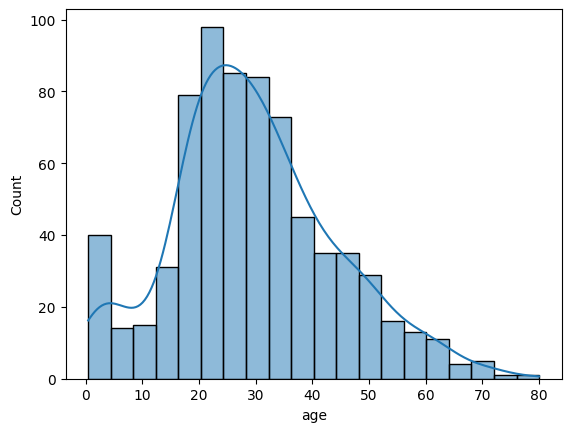

In [ ]:
sns.histplot(df['age'],kde=True)

In [ ]:
df['age_impute']=df['age'].fillna(df['age'].mean())

In [ ]:
df[['age','age_impute']]

,age,age_impute
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


In [ ]:
## MEan Imputation Works Well when we have normally distributed data

### 2. Median Value Imputation- If we have outliers in the dataset

In [ ]:
df['age_median']=df['age'].fillna(df['age'].median())

In [ ]:
df[['age','age_median']]

,age,age_median
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,NaN,28.0
889,26.0,26.0


### 3. Mode Imputation Technqiue--Categorical values


In [ ]:
df['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [ ]:
df['deck_mode']=df['deck'].fillna(df['deck'].mode().iloc[0])

In [ ]:
df[['deck','deck_mode']]

,deck,deck_mode
0,NaN,C
1,C,C
2,NaN,C
3,C,C
4,NaN,C
...,...,...
886,NaN,C
887,B,B
888,NaN,C
889,C,C


In [ ]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_impute,age_median,deck_mode
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0,B
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0,B


In [ ]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df['embarked_null']=df['embarked'].fillna(df['embarked'].mode()[0])

In [ ]:
df[['embarked','embarked_null']]

,embarked,embarked_null
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


<a id='outliers'></a>
### Outliers Treatment

In [1]:
import numpy as np
import seaborn as sns
marks=[-100,-200,45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74,150,170,180]

In [67]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


dt = {"col1":[51,22,13,64,50,50,17,580,19,1000],
      "col2":[82.5,82.5,89,82.5,76,82.5,53,82.5,900,82.5],
      "col3":['male','male','male','male','male','male','male','male','female','male'],
      "col4":['good','bad','good','good','good','bad','bad','good','good','good']}

data = pd.DataFrame(dt)

data

,col1,col2,col3,col4
0,51,82.5,male,good
1,22,82.5,male,bad
2,13,89.0,male,good
3,64,82.5,male,good
4,50,76.0,male,good
5,50,82.5,male,bad
6,17,53.0,male,bad
7,580,82.5,male,good
8,19,900.0,female,good
9,1000,82.5,male,good


<Axes: >

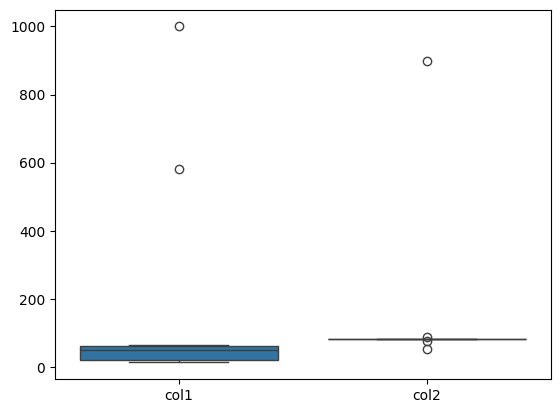

In [3]:
sns.boxplot(data)

In [72]:
#detect outlier
def detect_outlier(features):
    q1=features.quantile(0.25)
    q3=features.quantile(0.75)
    
    IQR=q3-q1
    lower_bound=q1-(1.5*IQR)    
    upper_bound=q3+(1.5*IQR)
    return features.index[(features<lower_bound)|(features>upper_bound)].tolist()



In [70]:
num_cols=data.select_dtypes(include='number')

print(num_cols)

   col1   col2
0    51   82.5
1    22   82.5
2    13   89.0
3    64   82.5
4    50   76.0
5    50   82.5
6    17   53.0
7   580   82.5
8    19  900.0
9  1000   82.5


In [ ]:
for col in num_cols:
    # print(data[col])
    outliers_idx= detect_outlier(data[col])
    print(col,'----> ',outliers_idx)


col1 ---->  [7, 9]
col2 ---->  [2, 4, 6, 8]


In [68]:
data

,col1,col2,col3,col4
0,51,82.5,male,good
1,22,82.5,male,bad
2,13,89.0,male,good
3,64,82.5,male,good
4,50,76.0,male,good
5,50,82.5,male,bad
6,17,53.0,male,bad
7,580,82.5,male,good
8,19,900.0,female,good
9,1000,82.5,male,good


In [73]:
#handle outlier
for col in num_cols:
    idx=detect_outlier(data[col])
    # print(data[col].loc[idx])
    data[col].loc[idx]=data[col].median()

In [44]:
data

,col1,col2,col3,col4
0,51,82.5,male,good
1,22,82.5,male,bad
2,13,82.5,male,good
3,64,82.5,male,good
4,50,82.5,male,good
5,50,82.5,male,bad
6,17,82.5,male,bad
7,50,82.5,male,good
8,19,82.5,female,good
9,50,82.5,male,good


## Data Encoding

1. Nominal/OHE Encoding
2. Label and Ordinal Encoding
3. Target Guided Ordinal Encoding 

### Ordinal Encoding
It is used to encode categorical data that have an intrinsic order or ranking. In this technique, each category is assigned a numerical value based on its position in the order. For example, if we have a categorical variable "education level" with four possible values (high school, college, graduate, post-graduate), we can represent it using ordinal encoding as follows:

1. High school: 1
2. College: 2
3. Graduate: 3
4. Post-graduate: 4

In [4]:
## ORdinal Encoding
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

In [22]:
# create a sample dataframe with an ordinal variable
df = pd.DataFrame({
    'size': ['small', 'medium', 'large', 'medium', 'small', 'large']
})

In [23]:
df

,size
0,small
1,medium
2,large
3,medium
4,small
5,large


In [24]:
## create an instance of ORdinalEncoder and then fit_transform
encoder=OrdinalEncoder(categories=[['small','medium','large']])

In [25]:
df['df_encoder']=encoder.fit_transform(df[['size']])

In [26]:
df

,size,df_encoder
0,small,0.0
1,medium,1.0
2,large,2.0
3,medium,1.0
4,small,0.0
5,large,2.0


### Label Encoding 
Label encoding and ordinal encoding are two techniques used to encode categorical data as numerical data.

Label encoding involves assigning a unique numerical label to each category in the variable. The labels are usually assigned in alphabetical order or based on the frequency of the categories. For example, if we have a categorical variable "color" with three possible values (red, green, blue), we can represent it using label encoding as follows:

1. Red: 1
2. Green: 2
3. Blue: 3

* 🏷️ LabelEncoder → for labels or unordered categories

*  🔢 OrdinalEncoder → for ordered categories

In [74]:
data

,col1,col2,col3,col4
0,51,82.5,male,good
1,22,82.5,male,bad
2,13,82.5,male,good
3,64,82.5,male,good
4,50,82.5,male,good
5,50,82.5,male,bad
6,17,82.5,male,bad
7,50,82.5,male,good
8,19,82.5,female,good
9,50,82.5,male,good


In [53]:
cat_cols=data.select_dtypes(include=['category','object'])
print(cat_cols)

     col3  col4
0    male  good
1    male   bad
2    male  good
3    male  good
4    male  good
5    male   bad
6    male   bad
7    male  good
8  female  good
9    male  good


In [54]:
for col in cat_cols:
    data[col]=data[col].astype('category')
    # print(data[col])
    print(col ,"---> ",dict(enumerate(data[col].cat.categories)))
    data[col]=data[col].cat.codes  # male-1,female->0


col3 --->  {0: 'female', 1: 'male'}
col4 --->  {0: 'bad', 1: 'good'}


In [55]:
data

,col1,col2,col3,col4
0,51,82.5,1,1
1,22,82.5,1,0
2,13,89.0,1,1
3,64,82.5,1,1
4,50,76.0,1,1
5,50,82.5,1,0
6,17,53.0,1,0
7,580,82.5,1,1
8,19,900.0,0,1
9,1000,82.5,1,1


In [30]:
#also we can use direct funticon for label encoding

# from sklearn.preprocessing import LabelEncoder
# lbl_encoder=LabelEncoder()
# lbl_encoder.fit_transform(df[['color']])

#### One Hot Encoding

### Nominal/OHE Encoding
One hot encoding, also known as nominal encoding, is a technique used to represent categorical data as numerical data, which is more suitable for machine learning algorithms. In this technique, each category is represented as a binary vector where each bit corresponds to a unique category. For example, if we have a categorical variable "color" with three possible values (red, green, blue), we can represent it using one hot encoding as follows:

1. Red: [1, 0, 0]
2. Green: [0, 1, 0]
3. Blue: [0, 0, 1]

In [56]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [75]:
##create an instance of Onehotencoder
encoder=OneHotEncoder()

In [76]:
## perform fit and transform
encoded=encoder.fit_transform(data[['col3','col4']]).toarray()

In [77]:
import pandas as pd
encoder_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [78]:
# If you instead want to replace the original categorical columns, drop them first:
data = pd.concat([data.drop(columns=cat_cols), encoder_df], axis=1)


In [79]:
data

,col1,col2,col3_female,col3_male,col4_bad,col4_good
0,51,82.5,0.0,1.0,0.0,1.0
1,22,82.5,0.0,1.0,1.0,0.0
2,13,82.5,0.0,1.0,0.0,1.0
3,64,82.5,0.0,1.0,0.0,1.0
4,50,82.5,0.0,1.0,0.0,1.0
5,50,82.5,0.0,1.0,1.0,0.0
6,17,82.5,0.0,1.0,1.0,0.0
7,50,82.5,0.0,1.0,0.0,1.0
8,19,82.5,1.0,0.0,0.0,1.0
9,50,82.5,0.0,1.0,0.0,1.0


In [80]:
# Preferred: just add the new OHE columns alongside existing columns:
# data = pd.concat([data, encoder_df], axis=1)